### General Steps in Modeling

1. Algorithm Selection

2. Fit the models -- turning an algorithm into a model for our specific dataset
    
    Linear Regression is y =mx + b
    
    Our model is final_grade = 1.3 * exam1 + 12
    
    We 'learn' the coefficients
    
3. Predict + Evaluate

4. Repeat

5. Take the best model and use it on the test set to see if we overfit

In [1]:
# prep the environment

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, explained_variance_score
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.feature_selection import SelectKBest, f_regression, RFE

import warnings
warnings.filterwarnings("ignore")

import wrangle
import split_scale

from pydataset import data

### Using the data on student grades from this lesson, complete the following:

- Split the data into train and test datasets.
- Create a model that uses exam 1 to predict the final grade.
- Create a model that uses exam 2 to predict the final grade.
- Compare your models in the following manner:
    - Calculate the mean squared error
    - Visualize the residuals. Create a seperate visualization for each model.
    - Visualize the actual vs the predicted values. Create a seperate visualization for each model.
    - **Bonus**: Combine the seperate visualizations for each model into a single visualization. Is this visual helpful?
- Create a model that uses exam 1 and exam 3 to predict final grade. How does this model compare to your previous ones?
- Take your best preforming model and measure its performance on the test data set. How does performance differ between train and test?

In [2]:
grades = wrangle.wrangle_grades()

In [3]:
grades.head()

,exam1,exam2,exam3,final_grade
0,100,90,95,96
1,98,93,96,95
2,85,83,87,87
3,83,80,86,85
4,93,90,96,97


In [4]:
train, test = split_scale.split_my_data(grades, .8)

In [5]:
train.head()

,exam1,exam2,exam3,final_grade
100,62,70,79,70
42,83,80,86,85
77,70,75,78,72
83,79,70,85,81
53,98,93,96,95


In [6]:
X_train = train.drop(columns='final_grade')
y_train = train[['final_grade']]
X_test = test.drop(columns='final_grade')
y_test = test[['final_grade']]

In [7]:
X_train.head()

,exam1,exam2,exam3
100,62,70,79
42,83,80,86
77,70,75,78
83,79,70,85
53,98,93,96


In [8]:
# also here we're creating a dataframe of the actual and all future predictions from the models

prediction = pd.DataFrame({
    'actual': train.final_grade
})

In [9]:
prediction.head()

,actual
100,70
42,85
77,72
83,81
53,95


In [10]:
# Create a baseline of the final grade mean to compare models against

prediction['baseline'] = train.final_grade.mean()

In [11]:
# Create a model that uses exam 1 to predict the final grade.

X = train[['exam1']]
y = train.final_grade

lm = LinearRegression()
lm.fit(X, y)

prediction['simple_exam1_lm'] = lm.predict(X)

In [16]:
prediction.head()

,actual,baseline,simple_exam1_lm,simple_exam2_lm
100,70,81.679012,69.302117,74.551798
42,85,81.679012,84.920143,84.270727
77,72,81.679012,75.251841,79.411262
83,81,81.679012,81.945281,74.551798
53,95,81.679012,96.075876,96.905334


In [13]:
# Create a model that uses exam 2 to predict the final grade.

X = train[['exam2']]
y = train.final_grade

lm = LinearRegression()
lm.fit(X, y)

prediction['simple_exam2_lm'] = lm.predict(X)

In [14]:
prediction.head()

,actual,baseline,simple_exam1_lm,simple_exam2_lm
100,70,81.679012,69.302117,74.551798
42,85,81.679012,84.920143,84.270727
77,72,81.679012,75.251841,79.411262
83,81,81.679012,81.945281,74.551798
53,95,81.679012,96.075876,96.905334


In [19]:
# Compare your models in the following manner:
# Calculate the mean squared error

mean_squared_error(prediction.actual, prediction.baseline)

113.47721383935377

In [20]:
mean_squared_error(prediction.actual, prediction.simple_exam1_lm)

3.437692212557048

In [22]:
mean_squared_error(prediction.actual, prediction.simple_exam2_lm)

17.083836668687205

In [23]:
# calcaulte mean squared error for every column in the df

prediction.apply(lambda col: mean_squared_error(prediction.actual, col))

actual               0.000000
baseline           113.477214
simple_exam1_lm      3.437692
simple_exam2_lm     17.083837
dtype: float64

In [ ]:
def plot

Text(0.5, 1, 'Predicted vs Actual Final Grade')

<Figure size 1080x1080 with 0 Axes>

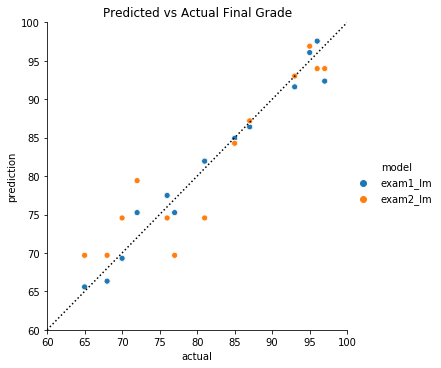

In [33]:
# Visualize the residuals. Create a seperate visualization for each model.

plt.figure(figsize=(15,15))

pd.DataFrame({'actual': prediction.actual, 'exam1_lm': prediction.simple_exam1_lm, 'exam2_lm': prediction.simple_exam2_lm}).melt(id_vars=['actual'],var_name='model',value_name='prediction').pipe((sns.relplot,'data'),x='actual',y='prediction',hue='model')
min, max = 60, 100
plt.plot([min, max], [min, max], c='black', ls=':')
plt.ylim(min, max)
plt.xlim(min, max)
plt.title('Predicted vs Actual Final Grade')

In [34]:
# Create a model that uses exam 1 and exam 3 to predict final grade. How does this model compare to your
# previous ones?

# Initialize the Linear Regression Object 
lm = LinearRegression()

rfe = RFE(lm, 2)

# Transforming data using RFE
X_rfe = rfe.fit_transform(X_train,y_train)

In [35]:
# boolean mask for each variable of whether it was selected or not. 
mask = rfe.support_

# select the column names of the features that were selected and convert them to a list for future use. 
rfe_features = X_train.columns[mask]

# print them out here for our reference
print(f'selected {len(rfe_features)} features:', ', '.join(rfe_features))

selected 2 features: exam1, exam3


In [37]:
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [38]:
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [40]:
print("Linear Model:", lm)

print("intercept: ", lm.intercept_)

print("features: ", rfe_features)
print("coefficients: ", lm.coef_)

Linear Model: LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
intercept:  [12.32533443]
features:  Index(['exam1', 'exam3'], dtype='object')
coefficients:  [[0.58402015 0.27829856]]


In [42]:
prediction['exam1_exam3_lm'] = lm.predict(X_rfe)

prediction.head()

,actual,baseline,simple_exam1_lm,simple_exam2_lm,exam1_exam3_lm
100,70,81.679012,69.302117,74.551798,70.520170
42,85,81.679012,84.920143,84.270727,84.732683
77,72,81.679012,75.251841,79.411262,74.914032
83,81,81.679012,81.945281,74.551798,82.118304
53,95,81.679012,96.075876,96.905334,96.275970


In [43]:
prediction.apply(lambda col: mean_squared_error(prediction.actual, col))

actual               0.000000
baseline           113.477214
simple_exam1_lm      3.437692
simple_exam2_lm     17.083837
exam1_exam3_lm       2.897082
dtype: float64

In [74]:
# Take your best performing model and measure its performance on the test data set. How does performance
# differ between train and test?

# Initialize the Linear Regression Object 
lm = LinearRegression()

rfe = RFE(lm, 2)

# Transforming data using RFE
X_rfe = rfe.fit_transform(X_test,y_test)

In [75]:
# boolean mask for each variable of whether it was selected or not. 
mask = rfe.support_

# select the column names of the features that were selected and convert them to a list for future use. 
rfe_features = X_train.columns[mask]

# print them out here for our reference
print(f'selected {len(rfe_features)} features:', ', '.join(rfe_features))

selected 2 features: exam1, exam3


In [76]:
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [77]:
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [78]:
lm.fit(X_rfe, y_test)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [79]:
print("Linear Model:", lm)

print("intercept: ", lm.intercept_)

print("features: ", rfe_features)
print("coefficients: ", lm.coef_)

Linear Model: LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
intercept:  [8.46011268]
features:  Index(['exam1', 'exam3'], dtype='object')
coefficients:  [[0.55357589 0.36084962]]


In [80]:
test_predictions = lm.predict(X_rfe)
test_actual = test.final_grade

AttributeError: 'DataFrame' object has no attribute 'final_grade'

In [81]:
mse = mean_squared_error(test_actual, test_predictions)

mse

3.1510530153610743

In [82]:
import math

rmse = math.sqrt(mse)
rmse


1.775120563612814

Our scenario continues:

### As a customer analyst, I want to know who has spent the most money with us over their lifetime. I have monthly charges and tenure, so I think I will be able to use those two attributes as features to estimate total_charges. I need to do this within an average of $5.00 per customer.

- Run all your previous scripts that acquired, prepared, split, and scaled the telco churn data.
- Fit 3 different linear models to your data, one with just tenure, one with just monthly_charges, and one with both.
- Evaluate the models and your baseline.
- Select the model that performed the best, and apply it to your test data.

In [59]:
telco = wrangle.wrangle_telco()

In [60]:
telco.head()

,customer_id,monthly_charges,tenure,total_charges
0,0013-SMEOE,109.70,71,7904.25
1,0014-BMAQU,84.65,63,5377.80
2,0016-QLJIS,90.45,65,5957.90
3,0017-DINOC,45.20,54,2460.55
4,0017-IUDMW,116.80,72,8456.75


In [61]:
train, test = split_scale.split_my_data(telco, .8)

In [62]:
train.head()

,customer_id,monthly_charges,tenure,total_charges
310,1945-XISKS,19.65,67,1335.20
781,4822-LPTYJ,103.75,72,7346.20
1398,8219-VYBVI,25.00,39,1004.35
239,1407-DIGZV,19.10,3,52.00
753,4671-VJLCL,79.85,63,4861.45


In [63]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1356 entries, 310 to 576
Data columns (total 4 columns):
customer_id        1356 non-null object
monthly_charges    1356 non-null float64
tenure             1356 non-null int64
total_charges      1356 non-null float64
dtypes: float64(2), int64(1), object(1)
memory usage: 53.0+ KB


In [64]:
train.shape

(1356, 4)

In [83]:
predictions = pd.DataFrame({'actual': train.total_charges})

In [87]:
X, y = train[['tenure']], train.total_charges

lm = LinearRegression().fit(X, y)
predictions['total_charges ~ tenure'] = lm.predict(X)

In [88]:
X, y = train[['monthly_charges']], train.total_charges

lm = LinearRegression().fit(X, y)
predictions['total_charges ~ monthly_charges'] = lm.predict(X)

In [89]:
X, y = train[['tenure', 'monthly_charges']], train.total_charges

lm = LinearRegression().fit(X, y)
predictions['total_charges ~ tenure + monthly_charges'] = lm.predict(X)

In [ ]:
predictions.apply(lambda c: mean_squared_error(predictions.actual, c))

In [ ]:
# RFE + PolynomialFeatures

X, y = train[['tenure', ]]